# Hypothesis 3

1. Rename this notebook to correct name `3-Name_Surname.ipynb`
2. Fit 3 non linear models for regression target `__price_doc`: Decision Tree, Random Forest, Gradient Boosting
    - Find optimal hyperparameters for each model
3. Fit 3 non linear models for classification target `__churn`: Decision Tree, Random Forest, Gradient Boosting
    - Find optimal hyperparameters coefficient for each model
4. Fill table below with metrics for all models (Please hold this table in the top of notebook)
5. Select best models: one for regression and classification task and add it prediction to submission dataset (see code below)
6. Send submission csv file to me

Notes:
- You can get up to 1 point
- Use all new features which you created in hypothesis 1
- Deadline 20 April 13.00

## 4. Table with metrics (Fill the table)

In [1]:
import numpy as np
import pandas as pd

# table with metrics for all models
scoring = pd.DataFrame([
    # get info from hypothesis 2
    ('Linear Regression', np.NaN, 'mean_squared_log_error', 0.1533),
    ('Lasso', 0.01, 'mean_squared_log_error', 0.1530),
    ('Ridge', 150, 'mean_squared_log_error', 0.1515),
    
    # Hypothesis 3
    # Example:
    # ('Decision Tree Regressor', '{max_depth=3, random_state=73, criterion='squared_error'}', 'mean_squared_log_error', 0.1601),
    ('Decision Tree Regressor', '{max_depth=5, random_state=73, criterion="squared_error"}', 'mean_squared_log_error', 0.1520),
    ('Random Forest Regressor', '{max_depth=50, random_state=73, criterion="squared_error"}', 'mean_squared_log_error', 0.1401),
    ('Gradient Boosting Regressor', '{random_state=73,learning_rate=0.05,n_estimators=100,max_depth=5}', 'mean_squared_log_error', 0.1408),
    
    # get info from hypothesis 2
    ('Logistic Regression', np.NaN, 'roc_auc_score', 0.9627),
    ('Log Reg + L1', 1, 'roc_auc_score', 0.9631),
    ('Log Reg + L2', 1, 'roc_auc_score', 0.9629),
    
    # Hypothesis 3
    ('Decision Tree Classifier', '{max_depth=5, random_state=73}', 'roc_auc_score', 0.9306),
    ('Random Forest Classifier', '{max_depth=10, random_state=73,n_estimators=100}', 'roc_auc_score', 0.9626),
    ('Gradient Boosting Classifier', '{n_estimators=100, max_depth=5,learning_rate=0.05}', 'roc_auc_score', 0.9644),
], columns=['alg', 'hyperparametes', 'metric_name', 'metric_value'])

scoring

,alg,hyperparametes,metric_name,metric_value
0,Linear Regression,NaN,mean_squared_log_error,0.1533
1,Lasso,0.01,mean_squared_log_error,0.1530
2,Ridge,150,mean_squared_log_error,0.1515
3,Decision Tree Regressor,"{max_depth=5, random_state=73, criterion=""squa...",mean_squared_log_error,0.1520
4,Random Forest Regressor,"{max_depth=50, random_state=73, criterion=""squ...",mean_squared_log_error,0.1401
5,Gradient Boosting Regressor,"{random_state=73,learning_rate=0.05,n_estimato...",mean_squared_log_error,0.1408
6,Logistic Regression,NaN,roc_auc_score,0.9627
7,Log Reg + L1,1,roc_auc_score,0.9631
8,Log Reg + L2,1,roc_auc_score,0.9629
9,Decision Tree Classifier,"{max_depth=5, random_state=73}",roc_auc_score,0.9306


In [2]:
submission['__churn_predict_best']=X_y_datasets[-1][-1]["__churn_predict_gradientboosting"]
submission['__price_predict_best']=X_y_datasets[-1][-1]["__price_predict_randomforest"]

NameError: name 'X_y_datasets' is not defined

## 6. Prepare submission dataset

In [3]:
def alg1(x):
    """
    Algorithm version 1
    """
    return x['__price_predict']

final_score = (
    submission[['__churn_predict_best', '__price_predict_best']]
    .rename(columns={
        '__churn_predict_best': '__churn_prob',
        '__price_predict_best': '__price_predict',
    })
)
final_score['__priority'] = final_score.apply(alg1, axis=1)
# select only 3 features
final_score = final_score[['__price_predict', '__churn_prob', '__priority']]
print(final_score.columns.tolist())
print(final_score.shape)
assert final_score.shape == (9988, 3)
assert final_score.columns.tolist() == ['__price_predict', '__churn_prob', '__priority']
final_score.to_csv('3-Mariia_Dmitrieva.csv', index=False)
final_score.head()

NameError: name 'submission' is not defined

# Non linear models

In [4]:
import pandas as pd
import numpy as np

pd.set_option('mode.chained_assignment', None)
pd.options.display.max_rows = 100

train_raw = pd.read_csv('train_corr.csv')
submission = pd.read_csv('test_corr.csv')

In [5]:
train_raw.head().T

,0,1,2,3,4
max_floor,9.0,9.0,9.0,9.0,9.0
state,2.0,2.0,2.0,2.0,2.0
marital_status,Single,Married,Single,Married,Married
big_market_raion,no,no,no,no,no
total_revolving_bal,1906,12,658,0,1706
...,...,...,...,...,...
f__incineration_raion_yes,0.0,0.0,0.0,0.0,0.0
f__detention_facility_raion_no,1.0,1.0,1.0,0.0,1.0
f__detention_facility_raion_yes,0.0,0.0,0.0,1.0,0.0
f__railroad_terminal_raion_no,1.0,1.0,1.0,1.0,1.0


# Select prepared features only

In [6]:
remove_features = train_raw.columns[train_raw.columns.str.startswith('__')].tolist()
remove_features

['__churn', '__price_doc']

In [9]:
final_features = [c for c in train_raw.columns if c.startswith('f__')]
# tmp = (train_raw[final_features].dtypes != 'object')
# final_features = tmp[tmp == True].index.tolist()
final_features

['f__max_floor',
 'f__state',
 'f__total_revolving_bal',
 'f__market_count_1500',
 'f__leisure_count_3000',
 'f__total_ct_chng_q4_q1',
 'f__railroad_station_walk_km',
 'f__contacts_count_12_mon',
 'f__0_17_all',
 'f__trc_count_2000',
 'f__build_count_wood',
 'f__credit_limit',
 'f__total_trans_ct',
 'f__leisure_count_5000',
 'f__life_sq',
 'f__cafe_count_1000_price_1000',
 'f__mkad_km',
 'f__school_education_centers_top_20_raion',
 'f__avg_utilization_ratio',
 'f__public_transport_station_min_walk',
 'f__customer_age',
 'f__detention_facility_km',
 'f__sport_count_2000',
 'f__cafe_sum_1000_min_price_avg',
 'f__total_amt_chng_q4_q1',
 'f__metro_km_walk',
 'f__office_sqm_5000',
 'f__total_trans_amt',
 'f__months_inactive_12_mon',
 'f__cafe_sum_1500_min_price_avg',
 'f__floor',
 'f__num_room',
 'f__months_on_book',
 'f__dependent_count',
 'f__avg_open_to_buy',
 'f__build_year',
 'f__full_sq',
 'f__total_relationship_count',
 'f__build_count_mix',
 'f__marital_status_Married',
 'f__marital

# Split dataset for Train, Test and Submission 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

RANDOM_STATE = 47

train, test = train_test_split(train_raw, test_size=0.5, random_state=RANDOM_STATE)
train.shape, test.shape, submission.shape

((6976, 147), (6977, 147), (9988, 145))

In [6]:
X_train = train[final_features].fillna(0).copy(True)
X_test = test[final_features].fillna(0).copy(True)
X_sub = submission[final_features].fillna(0).copy(True)

# list in which we store a set of different datasets for training and evaluating the model
# (dataset name, training set of features, deferred set of features)
# the training dataset should come first
X_y_datasets = [
    ('train', X_train, train),
    ('test', X_test, test),
    ('submission', X_sub, submission)]

X_train.shape, X_test.shape, X_sub.shape

((6976, 86), (6977, 86), (9988, 86))

In [7]:
X_train.dtypes

f__max_floor                                float64
f__state                                    float64
f__total_revolving_bal                      float64
f__market_count_1500                        float64
f__leisure_count_3000                       float64
f__total_ct_chng_q4_q1                      float64
f__railroad_station_walk_km                 float64
f__contacts_count_12_mon                    float64
f__0_17_all                                 float64
f__trc_count_2000                           float64
f__build_count_wood                         float64
f__credit_limit                             float64
f__total_trans_ct                           float64
f__leisure_count_5000                       float64
f__life_sq                                  float64
f__cafe_count_1000_price_1000               float64
f__mkad_km                                  float64
f__school_education_centers_top_20_raion    float64
f__avg_utilization_ratio                    float64
f__public_tr

# Non Linear Regression Models

## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80]:
    name, X_, y_ = X_y_datasets[0]
    reg_model = DecisionTreeRegressor(random_state=73, criterion="squared_error" ,max_depth=i)
    reg_model.fit(X_, y_['__price_doc'])
    print(f"max_depth {i}")
    for name, X_, y_ in X_y_datasets[:2]:
        print(f"{name} score: {reg_model.score(X_, y_['__price_doc'])}")

max_depth 1
train score: 0.2257845749914661
test score: 0.19019858333359174
max_depth 2
train score: 0.37090551087562595
test score: 0.3130587570830784
max_depth 3
train score: 0.4886055057518488
test score: 0.4082949259522074
max_depth 4
train score: 0.5299763843350889
test score: 0.42511533997196027
max_depth 5
train score: 0.567708524737015
test score: 0.426320403719617
max_depth 6
train score: 0.6087549588067636
test score: 0.40363987204794116
max_depth 7
train score: 0.645441556191094
test score: 0.40029030469924765
max_depth 8
train score: 0.6880133112215672
test score: 0.3796487415820874
max_depth 9
train score: 0.7257652079817851
test score: 0.3539467344362798
max_depth 10
train score: 0.7620673948670186
test score: 0.31611388284959885
max_depth 20
train score: 0.9902158393410253
test score: 0.09160367912073564
max_depth 30
train score: 0.9999903052844942
test score: 0.094253320501541
max_depth 40
train score: 1.0
test score: 0.08888973636491371
max_depth 50
train score: 1.0
te

In [82]:
reg_model = DecisionTreeRegressor(max_depth=5, random_state=73, criterion="squared_error")
name, X_, y_ = X_y_datasets[0]
reg_model.fit(X_, y_['__price_doc'])
value = reg_model.predict(X_)
for name, X_, y_ in X_y_datasets:
    value = reg_model.predict(X_)
    y_['__price_predict_decisiontree'] = value

[Text(0.5, 0.9166666666666666, 'X[36] <= 0.385\nsquared_error = 12.111\nsamples = 6976\nvalue = 6.555'),
 Text(0.25, 0.75, 'X[36] <= -0.121\nsquared_error = 5.857\nsamples = 5904\nvalue = 5.85'),
 Text(0.125, 0.5833333333333334, 'X[22] <= -0.704\nsquared_error = 3.376\nsamples = 3698\nvalue = 5.181'),
 Text(0.0625, 0.4166666666666667, 'X[21] <= 1.587\nsquared_error = 0.888\nsamples = 880\nvalue = 4.078'),
 Text(0.03125, 0.25, 'X[9] <= -0.393\nsquared_error = 0.779\nsamples = 837\nvalue = 4.154'),
 Text(0.015625, 0.08333333333333333, 'squared_error = 0.578\nsamples = 799\nvalue = 4.09'),
 Text(0.046875, 0.08333333333333333, 'squared_error = 3.141\nsamples = 38\nvalue = 5.487'),
 Text(0.09375, 0.25, 'X[0] <= 0.021\nsquared_error = 0.72\nsamples = 43\nvalue = 2.601'),
 Text(0.078125, 0.08333333333333333, 'squared_error = 0.486\nsamples = 31\nvalue = 2.316'),
 Text(0.109375, 0.08333333333333333, 'squared_error = 0.572\nsamples = 12\nvalue = 3.338'),
 Text(0.1875, 0.4166666666666667, 'X[36]

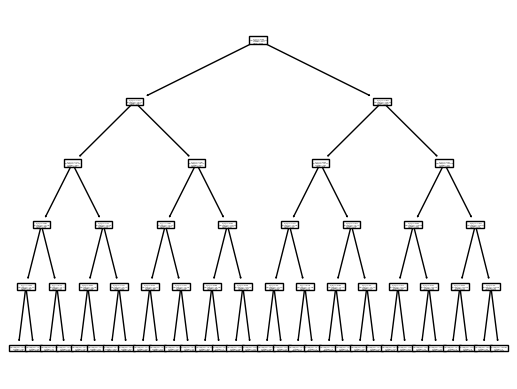

In [71]:
from sklearn import tree

tree.plot_tree(reg_model)

In [72]:
train_columns = X_.columns.tolist()
reg_importances = (
    pd.Series(reg_model.feature_importances_, index=train_columns)
    .sort_values(ascending=False)
    .round(4)
)
reg_importances.head()

f__full_sq                       0.6262
f__sport_count_2000              0.1924
f__office_sqm_5000               0.1015
f__cafe_count_1000_price_1000    0.0204
f__culture_objects_top_25_yes    0.0167
dtype: float64

<AxesSubplot:>

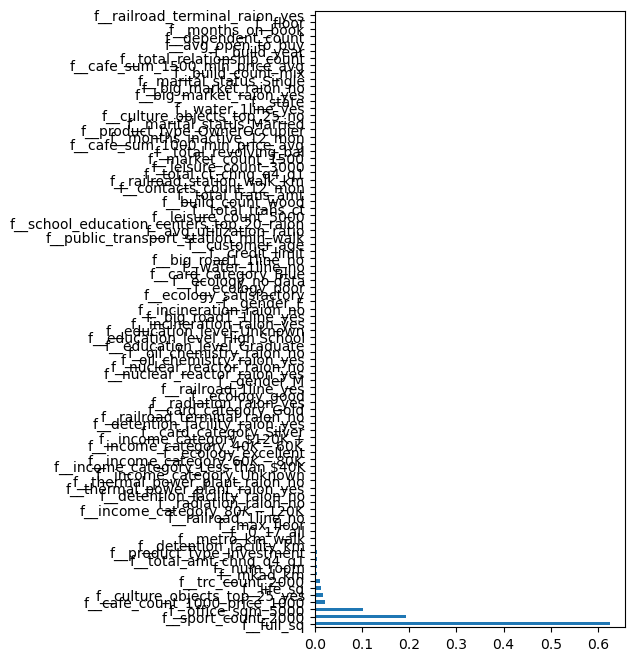

In [73]:
reg_importances.plot(kind='barh', figsize=(4, 8))

In [83]:
from sklearn.metrics import mean_squared_log_error

print('Metric mean_squared_log_error https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error')
for name, X_, y_ in X_y_datasets:
    if '__price_doc' in y_.columns:
        value = mean_squared_log_error(y_true=y_['__price_doc'], y_pred=y_['__price_predict_decisiontree'])
        print(f'{name:10s}: {value:.4f}')

Metric mean_squared_log_error https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error
train     : 0.1328
test      : 0.1520


## Random forest

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
for i in [10,50,100,200,250]:
    name, X_, y_ = X_y_datasets[0]
    reg_model = RandomForestRegressor(max_depth=i, random_state=73, criterion="squared_error")
    reg_model.fit(X_, y_['__price_doc'])
    print(f"max_depth {i}")
    for name, X_, y_ in X_y_datasets[:2]:
        print(f"{name} score: {reg_model.score(X_, y_['__price_doc'])}")

max_depth 10
train score: 0.8009981470294572
test score: 0.4903002071621174
max_depth 50
train score: 0.940249690005681
test score: 0.4947414992743595
max_depth 100
train score: 0.940249690005681
test score: 0.4947414992743595
max_depth 200
train score: 0.940249690005681
test score: 0.4947414992743595
max_depth 250
train score: 0.940249690005681
test score: 0.4947414992743595


In [9]:
reg_model = RandomForestRegressor(max_depth=50, random_state=73, criterion="squared_error")
name, X_, y_ = X_y_datasets[0]
reg_model.fit(X_, y_['__price_doc'])
value = reg_model.predict(X_)
for name, X_, y_ in X_y_datasets:
    value = reg_model.predict(X_)
    y_['__price_predict_randomforest'] = value

In [89]:
reg_importances = (
    pd.Series(reg_model.feature_importances_, index=train_columns)
    .sort_values(ascending=False)
    .round(4)
)
reg_importances.head()

f__full_sq             0.3918
f__sport_count_2000    0.1001
f__office_sqm_5000     0.0631
f__trc_count_2000      0.0372
f__metro_km_walk       0.0210
dtype: float64

<AxesSubplot:>

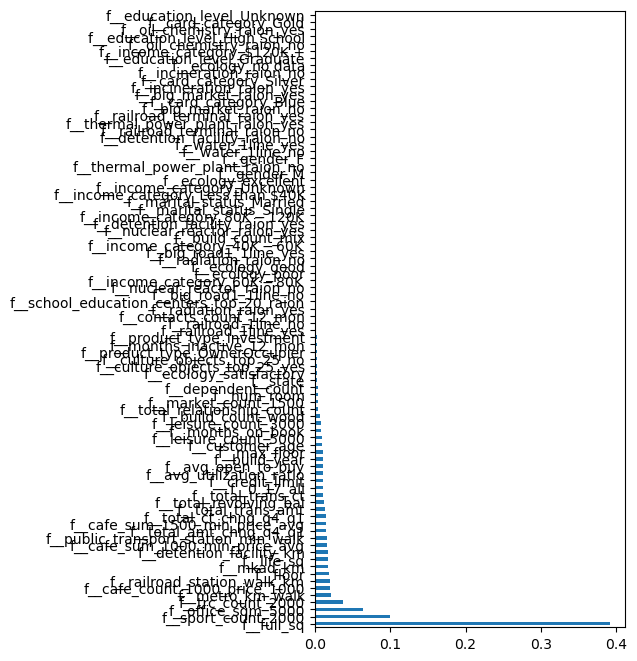

In [90]:
reg_importances.plot(kind='barh', figsize=(4, 8))

In [10]:
from sklearn.metrics import mean_squared_log_error

print('Metric mean_squared_log_error https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error')
for name, X_, y_ in X_y_datasets:
    if '__price_doc' in y_.columns:
        value = mean_squared_log_error(y_true=y_['__price_doc'], y_pred=y_['__price_predict_randomforest'])
        print(f'{name:10s}: {value:.4f}')

Metric mean_squared_log_error https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error
train     : 0.0314
test      : 0.1401


## Gradient Boosting

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

In [104]:
for i in [1,3,5,10]:
    for j in [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4]:
        name, X_, y_ = X_y_datasets[0]
        reg_model = GradientBoostingRegressor(random_state=73,learning_rate=j,n_estimators=100,max_depth=i)
        reg_model.fit(X_, y_['__price_doc'])
        print(f"max_depth {i},learning_rate {j}")
        for name, X_, y_ in X_y_datasets[:2]:
            print(f"{name} score: {reg_model.score(X_, y_['__price_doc'])}")

max_depth 1,learning_rate 0.01
train score: 0.243290985269618
test score: 0.20999262412231012
max_depth 1,learning_rate 0.05
train score: 0.48172857262346547
test score: 0.40337476596716293
max_depth 1,learning_rate 0.1
train score: 0.5389172335683506
test score: 0.4419143201398211
max_depth 1,learning_rate 0.15
train score: 0.5600239476007836
test score: 0.45351479510543646
max_depth 1,learning_rate 0.2
train score: 0.5699245058066917
test score: 0.45869987641092425
max_depth 1,learning_rate 0.25
train score: 0.575531690881368
test score: 0.46026301662016456
max_depth 1,learning_rate 0.3
train score: 0.5779733188965879
test score: 0.46171752237231733
max_depth 1,learning_rate 0.35
train score: 0.5800011260492728
test score: 0.46031491305524175
max_depth 1,learning_rate 0.4
train score: 0.5805324504985406
test score: 0.4612701254328265
max_depth 3,learning_rate 0.01
train score: 0.4530714680030017
test score: 0.38074617961208523
max_depth 3,learning_rate 0.05
train score: 0.63747219854

In [105]:
reg_model = GradientBoostingRegressor(random_state=73,learning_rate=0.05,n_estimators=100,max_depth=5)
name, X_, y_ = X_y_datasets[0]
reg_model.fit(X_, y_['__price_doc'])
value = reg_model.predict(X_)
for name, X_, y_ in X_y_datasets:
    value = reg_model.predict(X_)
    y_['__price_predict_gradientboosting'] = value

In [106]:
reg_importances = (
    pd.Series(reg_model.feature_importances_, index=train_columns)
    .sort_values(ascending=False)
    .round(4)
)
reg_importances.head()

f__full_sq                       0.4976
f__office_sqm_5000               0.1081
f__sport_count_2000              0.1038
f__trc_count_2000                0.0335
f__cafe_count_1000_price_1000    0.0239
dtype: float64

<AxesSubplot:>

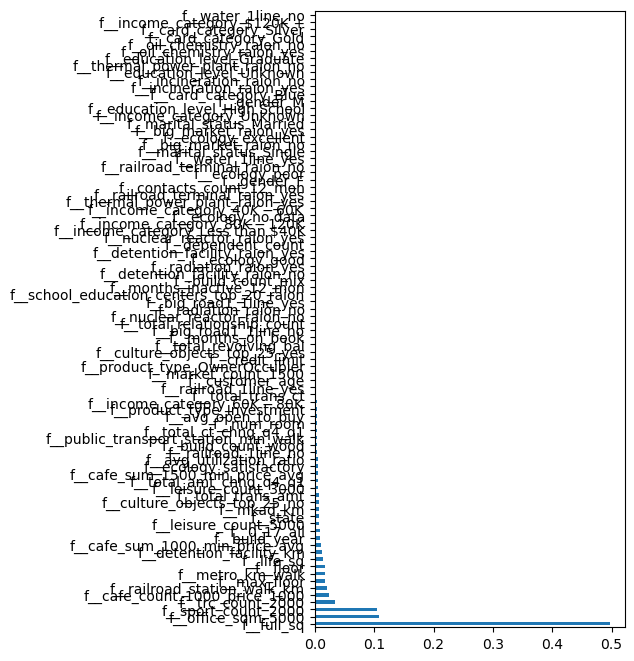

In [107]:
reg_importances.plot(kind='barh', figsize=(4, 8))

In [108]:
from sklearn.metrics import mean_squared_log_error

print('Metric mean_squared_log_error https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error')
for name, X_, y_ in X_y_datasets:
    if '__price_doc' in y_.columns:
        value = mean_squared_log_error(y_true=y_['__price_doc'], y_pred=y_['__price_predict_gradientboosting'])
        print(f'{name:10s}: {value:.4f}')

Metric mean_squared_log_error https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error
train     : 0.1039
test      : 0.1408


# Non Linear Classification Models

In [12]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.metrics import roc_auc_score

In [15]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    name, X_, y_ = X_y_datasets[0]
    reg_model = DecisionTreeClassifier(max_depth=i, random_state=73)
    reg_model.fit(X_, y_['__churn'])
    print(f"max_depth {i}")
    for name, X_, y_ in X_y_datasets[:2]:
        print(f"{name} score: {roc_auc_score(y_['__churn'],reg_model.predict_proba(X_)[:,1])}")

max_depth 1
train score: 0.8568654810155553
test score: 0.8631280397676743
max_depth 2
train score: 0.9100299858007328
test score: 0.9045928474611615
max_depth 3
train score: 0.929908498396738
test score: 0.9207891742871687
max_depth 4
train score: 0.9437391721359685
test score: 0.9260051549553197
max_depth 5
train score: 0.9546023343890502
test score: 0.9306153287088998
max_depth 6
train score: 0.9676090753496293
test score: 0.92629333873055
max_depth 7
train score: 0.9750965279469631
test score: 0.9238771642532521
max_depth 8
train score: 0.9817382074717182
test score: 0.9102705814887732
max_depth 9
train score: 0.9881313382993856
test score: 0.893435328463572
max_depth 10
train score: 0.992281609365118
test score: 0.8720599735045724
max_depth 11
train score: 0.9951469944064238
test score: 0.8610246585340423
max_depth 12
train score: 0.997022798805982
test score: 0.8502726207780579
max_depth 13
train score: 0.9986294446536191
test score: 0.8395695719639122
max_depth 14
train score: 0

In [20]:
reg_model = DecisionTreeClassifier(max_depth=5, random_state=73)
name, X_, y_ = X_y_datasets[0]
reg_model.fit(X_, y_['__churn'])
#value = reg_model.predict_proba(X_)[:,1]
for name, X_, y_ in X_y_datasets:
    value = reg_model.predict_proba(X_)[:,1]
    y_['__churn_predict_decisiontree'] = value

In [18]:
for i in [1,5,10,15,20,25,30]:
    name, X_, y_ = X_y_datasets[0]
    reg_model = RandomForestClassifier(max_depth=i, random_state=73,n_estimators=100)
    reg_model.fit(X_, y_['__churn'])
    print(f"max_depth {i}")
    for name, X_, y_ in X_y_datasets[:2]:
        print(f"{name} score: {roc_auc_score(y_['__churn'],reg_model.predict_proba(X_)[:,1])}")

max_depth 1
train score: 0.9555946066163171
test score: 0.9526113635945463
max_depth 5
train score: 0.9714721157892404
test score: 0.9603902555704797
max_depth 10
train score: 0.9971270785192405
test score: 0.9625704551448355
max_depth 15
train score: 0.9999987695609055
test score: 0.9615350941752993
max_depth 20
train score: 1.0
test score: 0.961407600262501
max_depth 25
train score: 1.0
test score: 0.9605990910596331
max_depth 30
train score: 1.0
test score: 0.9610420614914718


In [21]:
reg_model = RandomForestClassifier(max_depth=10, random_state=73,n_estimators=1000)
name, X_, y_ = X_y_datasets[0]
reg_model.fit(X_, y_['__churn'])
#value = reg_model.predict_proba(X_)[:,1]
for name, X_, y_ in X_y_datasets:
    value = reg_model.predict_proba(X_)[:,1]
    y_['__churn_predict_randomforest'] = value

In [31]:
for i in [3,5]:
    for j in [0.01,0.05,0.1]:
        name, X_, y_ = X_y_datasets[0]
        reg_model = GradientBoostingClassifier(n_estimators=100, max_depth=i, 
                                    learning_rate=j)
        reg_model.fit(X_, y_['__churn'])
        name, X_, y_ = X_y_datasets[1]
        print(f"max_depth {i},learning_rate {j}")
        for name, X_, y_ in X_y_datasets[:2]:
            print(f"{name} score: {roc_auc_score(y_['__churn'],reg_model.predict_proba(X_)[:,1])}")

max_depth 3,learning_rate 0.01
train score: 0.9565595784761749
test score: 0.9492170202456961
max_depth 3,learning_rate 0.05
train score: 0.9744293992504165
test score: 0.9630282985887505
max_depth 3,learning_rate 0.1
train score: 0.982751243358705
test score: 0.9650504149110379
max_depth 5,learning_rate 0.01
train score: 0.9749972468925259
test score: 0.9558964593031456
max_depth 5,learning_rate 0.05
train score: 0.9918994042213904
test score: 0.9644068888112016
max_depth 5,learning_rate 0.1
train score: 0.9982300133625686
test score: 0.9643046176869245


In [32]:
reg_model = GradientBoostingClassifier(n_estimators=100, max_depth=5,learning_rate=0.05)
name, X_, y_ = X_y_datasets[0]
reg_model.fit(X_, y_['__churn'])
#value = reg_model.predict_proba(X_)[:,1]
for name, X_, y_ in X_y_datasets:
    value = reg_model.predict_proba(X_)[:,1]
    y_['__churn_predict_gradientboosting'] = value

# Classifier comparison

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.


In [ ]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score


names = [
    "Logistic Regression",
    # "DecisionTree",
    # "Linear SVM",
    # "RBF SVM",
    "Gaussian Process",
    # "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting", 
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    
    LogisticRegression(C=10),
    # DecisionTreeClassifier(max_depth=5),
    # SVC(kernel="linear", C=0.025),
    # SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    # KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    GradientBoostingClassifier(max_depth=5, n_estimators=100, learning_rate=0.07, random_state=47),
    # HistGradientBoostingClassifier(max_depth=5, max_iter=100, learning_rate=0.05),
    MLPClassifier(hidden_layer_sizes=(100, 50,), alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_samples=400, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 1.5 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    linearly_separable,
    make_circles(n_samples=400, noise=0.2, factor=0.5, random_state=1),
    make_moons(n_samples=400, noise=0.2, random_state=0),
]

figure = plt.figure(figsize=(len(classifiers) * 4, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=42, stratify=y
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        
        predictions = clf.predict_proba(X_test)[:, 1]
        score = roc_auc_score(y_test, predictions)
        # score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
# plt.savefig('1.png')
plt.show()